<div class='alert alert-success'>
    <h1 align="center">Local Search Algorithms: Hill Climbing for N-Queens</h1> 
    <h3 align="center">Artificial Intelligece Course (Fall 2021)</h3>
    <h5 align="center">Seyed Naser RAZAVI <a href='http://www.snrazavi.ir/ai-slides/'>(website)</a></h5>
</div>

In [1]:
import random
import matplotlib.pyplot as plt
import ipywidgets as widgets

from IPython.display import clear_output
from nqueens import NQueensState, NQueensStatePermutation
from nqueens import create_animation

from matplotlib import animation, rc
rc('animation', html='html5')

plt.rcParams['figure.figsize'] = (6, 6)

## N-Queens Problem
- **Goal**: Place N queens on a N-by-N chess board so that no two queens can attack each other.
- Thus a solution requires that no two queens share the same row, column or diagonal.

<p align="center">
    <img src="imgs/Four-Queens-Local-Search.png" width="70%">
</p>
<h6 align="center">4-Queens problem</h6>

### Problem formulation: First formulation
- **States**: each column contains only one queen.
- **Actions**: move a queen to another row in its column.
- **State Space Size**: $N^N$


### Problem formulation: Second formulation (Permuatation)
- **States**: each column and each row contains only one queen.
- **Actions**: move a queen to another row in its column which is not occupied.
- **State Space Size**: $N!$

In [2]:
state = NQueensState.random_state(N=8)
print(state)

[6, 3, 7, 5, 1, 2, 6, 5] <5>


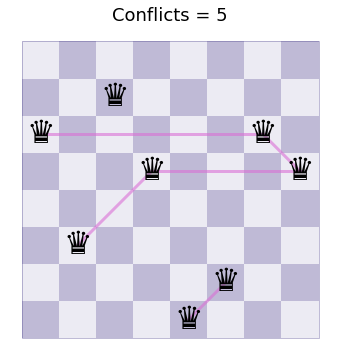

In [3]:
state.plot(show_conflicts=True)

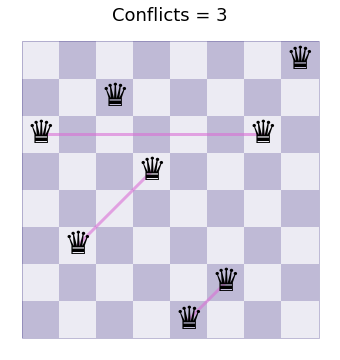

In [4]:
best_neighbor = state.best_neighbor()
best_neighbor.plot(show_conflicts=True)

In [5]:
best_neighbor

NQueensState(queens=[6, 3, 7, 5, 1, 2, 6, 8])

## Hill Climbing
<img src="imgs/hill_climbing.png" width="80%">

In [6]:
class HillClimbing:
    
    def __init__(self):
        self.history = []
        
    def search(self, state, verbose=0):
        current = state
        
        while True:
            if   verbose == 1: print(current)
            elif verbose == 2: current.plot(show_conflicts=False)
            elif verbose == 3: current.plot(show_conflicts=True)
            
            self.history.append(current)

            neighbor = current.best_neighbor()
            if neighbor >= current: return current
            current = neighbor
    
    def __call__(self, state, verbose=0):
        self.search(state, verbose)
        
    def plot_history(self):
        plt.figure(figsize=(12, 4))

        conflicts = [state.conflicts() for state in self.history]
        plt.plot(range(len(conflicts)), conflicts)
        plt.xlabel('Iteration')
        plt.ylabel('Conflicts')
        plt.show()

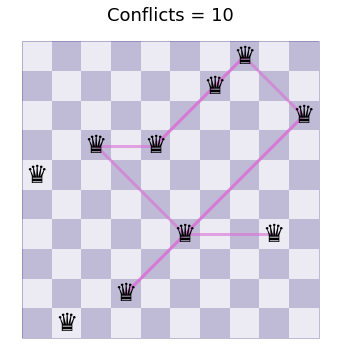

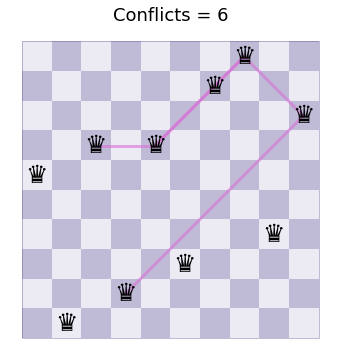

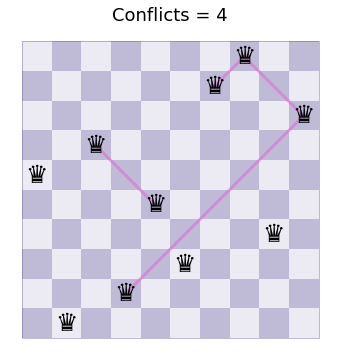

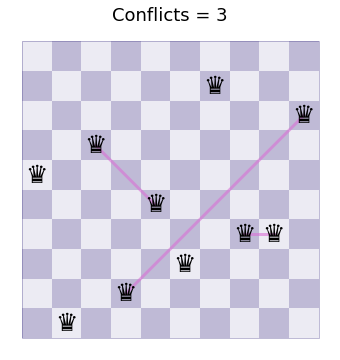

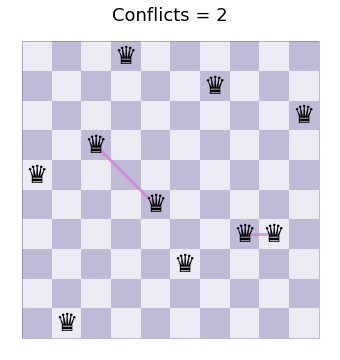

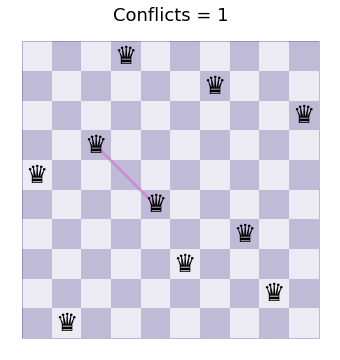

In [7]:
initial_state = NQueensState.random_state(10)

ha = HillClimbing()
solution = ha(initial_state, verbose=3)

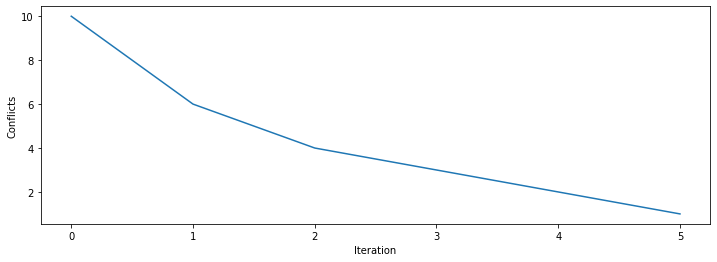

In [8]:
ha.plot_history()

In [9]:
def update_plot(i, show_conflicts):
    state = ha.history[i - 1]
    state.plot(show_conflicts=show_conflicts)

In [10]:
i = widgets.IntSlider(value=1, min=1, max=len(ha.history), description='i:')
show_conflicts = widgets.Checkbox(value=True, description='Show conflicts')

widgets.interact(update_plot, i=i, show_conflicts=show_conflicts);

interactive(children=(IntSlider(value=1, description='i:', max=6, min=1), Checkbox(value=True, description='Sh…

## Permutation

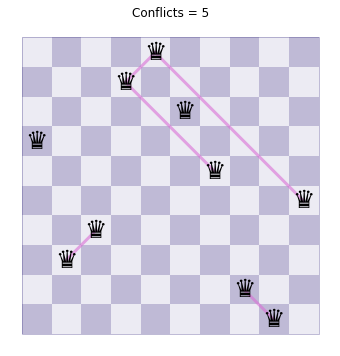

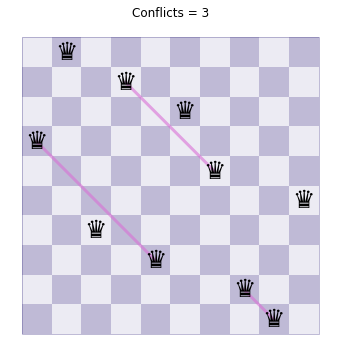

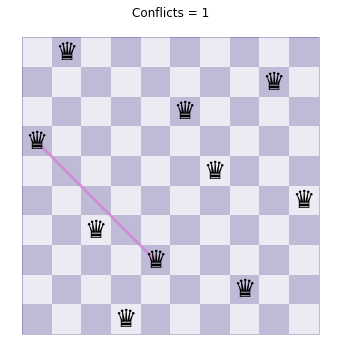

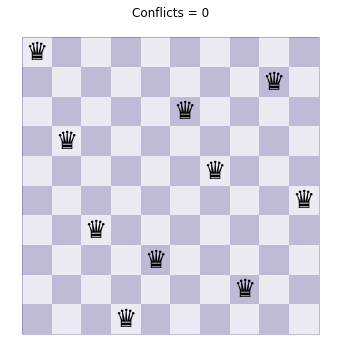

In [11]:
initial_state = NQueensStatePermutation.random_state(N=10)
ha = HillClimbing()

solution = ha(initial_state, verbose=3)

In [12]:
i = widgets.IntSlider(value=1, min=1, max=len(ha.history), description='i:')
show_conflicts = widgets.Checkbox(value=True, description='Show conflicts')

widgets.interact(update_plot, i=i, show_conflicts=show_conflicts);

interactive(children=(IntSlider(value=1, description='i:', max=4, min=1), Checkbox(value=True, description='Sh…

##  Animation

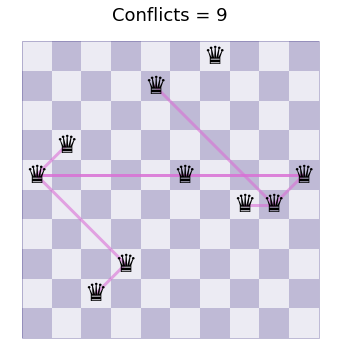

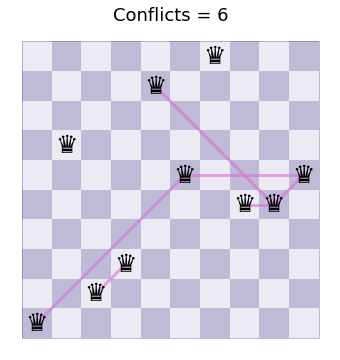

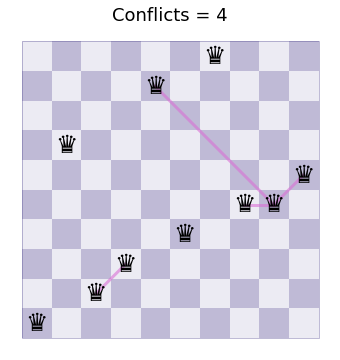

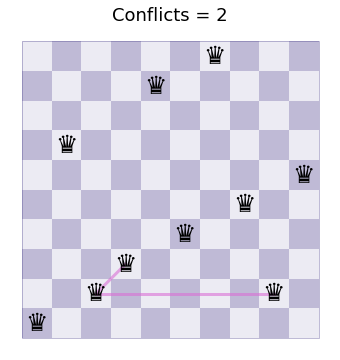

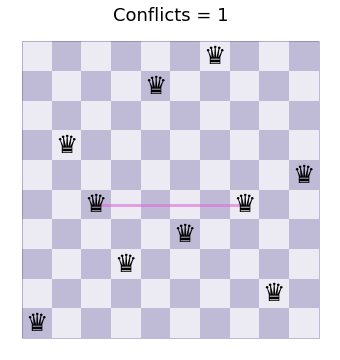

In [13]:
N = 10 # number of queens
initial_state = NQueensState.random_state(10)

ha = HillClimbing()
solution = ha(initial_state, verbose=3)

In [15]:
anim = create_animation(ha.history, figsize=(6, 6), xlabel='Iteration')
anim.save(f'imgs/{N}-queens-ha.gif', writer='imagemagick')
clear_output()

<img src="imgs/10-queens-ha.gif" width="50%">

In [18]:
anim = create_animation(ha.history, figsize=(18, 6), xlabel='Iteration', plot_objective=True)
anim.save(f'imgs/{N}-queens-ha-with-objective.gif', writer='imagemagick')
clear_output()

<img src="imgs/10-queens-ha-with-objective.gif">